In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#import Visualizer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, BaggingClassifier, StackingClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import BernoulliNB, GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score, recall_score, precision_score, f1_score
import warnings
warnings.filterwarnings("ignore")

In [41]:
import shap

In [2]:
test = pd.read_parquet('../data/supervised_test_data.parquet')

In [3]:
train = pd.read_parquet('../data/supervised_train_data.parquet')

In [4]:
import re
train = train.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
test = test.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))

In [5]:
train

,Tags_Willrevertafterreadingtheemail,TotalTimeSpentonWebsite,LeadProfile_PotentialLead,LeadQuality_None,Tags_Ringing,LastNotableActivity_SMSSent,LeadOrigin_LeadAddForm,LeadQuality_HighinRelevance,LeadQuality_Mightbe,LastActivity_SMSSent,...,Tags_Graduationinprogress,HowdidyouhearaboutXEducation_OnlineSearch,LeadProfile_DualSpecializationStudent,City_OtherMetroCities,LastActivity_Resubscribedtoemails,LeadProfile_OtherLeads,Specialization_BankingInvestmentAndInsurance,Specialization_SupplyChainManagement,LastNotableActivity_ViewinbrowserlinkClicked,Converted
0,0,0.731514,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0.000000,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0.000000,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1,0.532130,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
4,0,0.341549,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6925,0,0.044454,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6926,0,0.620158,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6927,0,0.411532,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6928,1,0.334947,1,0,0,1,0,0,1,1,...,0,1,0,0,0,0,0,0,0,1


In [6]:
print(train.shape)
print(test.shape)

(6930, 93)
(2310, 93)


In [7]:
train.sample(frac = 0.1).reset_index().drop("index", axis = 1, inplace = True)

In [8]:
test.sample(frac = 0.1).reset_index().drop("index", axis = 1, inplace = True)

In [9]:
x_train = train.drop("Converted", axis = 1)
y_train = train.iloc[:, -1]
x_test = test.drop("Converted", axis = 1)
y_test = test.iloc[:, -1]

In [10]:

pd.set_option('display.max_columns', 500)

In [11]:
x_train.head()

,Tags_Willrevertafterreadingtheemail,TotalTimeSpentonWebsite,LeadProfile_PotentialLead,LeadQuality_None,Tags_Ringing,LastNotableActivity_SMSSent,LeadOrigin_LeadAddForm,LeadQuality_HighinRelevance,LeadQuality_Mightbe,LastActivity_SMSSent,Whatisyourcurrentoccupation_WorkingProfessional,Tags_ClosedbyHorizzon,LeadSource_Reference,Tags_Alreadyastudent,LastActivity_OlarkChatConversation,LeadQuality_Worst,Tags_None,Tags_LosttoEINS,DoNotEmail_Yes,PageViewsPerVisit,LastActivity_ConvertedtoLead,LeadSource_WeLearn,LastActivity_Unreachable,Tags_InterestedinfulltimeMBA,Tags_opphangup,Tags_wrongnumbergiven,LeadSource_PayperClickAds,Tags_invalidnumber,Tags_RecognitionissueDECapproval,LeadProfile_LateralStudent,Tags_intouchwithEINS,LeadSource_WelingakWebsite,LastActivity_Approachedupfront,LeadSource_DirectTraffic,LastNotableActivity_EmailMarkedSpam,Specialization_RetailManagement,LastActivity_EmailMarkedSpam,Whatisyourcurrentoccupation_Housewife,Tags_switchedoff,LeadSource_blog,Tags_Universitynotrecognized,HowdidyouhearaboutXEducation_Other,LeadOrigin_LeadImport,Specialization_BusinessAdministration,Tags_DiplomaholderNotEligible,LastActivity_EmailBounced,Specialization_EBusiness,LastActivity_EmailOpened,LeadSource_Press_Release,LeadSource_LiveChat,Specialization_ECOMMERCE,LastNotableActivity_Resubscribedtoemails,Whatisyourcurrentoccupation_Other,Tags_Notdoingfurthereducation,Specialization_HumanResourceManagement,Tags_Busy,LeadSource_Google,Tags_LosttoOthers,LeadSource_youtubechannel,Tags_InconfusionwhetherparttimeorDLP,LeadOrigin_LandingPageSubmission,LeadProfile_StudentofSomeSchool,LastNotableActivity_EmailBounced,LastNotableActivity_FormSubmittedonWebsite,LastNotableActivity_EmailLinkClicked,LeadSource_google,Specialization_HealthcareManagement,TotalVisits,LastNotableActivity_EmailReceived,Specialization_ITProjectsManagement,LeadQuality_NotSure,Specialization_InternationalBusiness,LastNotableActivity_EmailOpened,LeadSource_testone,Tags_Wanttotakeadmissionbuthasfinancialproblems,LeadSource_bing,LastActivity_ViewinbrowserlinkClicked,LeadSource_Click2call,City_ThaneOutskirts,Specialization_MediaandAdvertising,LastNotableActivity_OlarkChatConversation,Whatisyourcurrentoccupation_Businessman,Specialization_OperationsManagement,Tags_Graduationinprogress,HowdidyouhearaboutXEducation_OnlineSearch,LeadProfile_DualSpecializationStudent,City_OtherMetroCities,LastActivity_Resubscribedtoemails,LeadProfile_OtherLeads,Specialization_BankingInvestmentAndInsurance,Specialization_SupplyChainManagement,LastNotableActivity_ViewinbrowserlinkClicked
0,0,0.731514,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.045455,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0.019920,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0.000000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0.000000,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0.000000,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0.532130,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0.090909,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0.019920,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0,0.341549,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0.072727,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0.015936,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [12]:
random_forest_pipeline = Pipeline([ ('RandomForest', RandomForestClassifier(random_state = 42))])
adaboost_pipeline = Pipeline([  ('Adaboost', AdaBoostClassifier(random_state = 42))])
ExtraTree_pipeline = Pipeline([  ('ExtraTreeClassifier', ExtraTreesClassifier(random_state = 42))])
BaggingClassifier_pipeline = Pipeline([  ('BaggingClassifier', BaggingClassifier(estimator = DecisionTreeClassifier(), random_state = 42))])
GradientBoost_pipeline = Pipeline([  ('GradientBoosting', GradientBoostingClassifier(random_state = 42))])
dtree_pipeline = Pipeline([  ('DecisionTree', DecisionTreeClassifier(random_state = 42))])
knn_pipeline = Pipeline([  ('KNN', KNeighborsClassifier())])
lr_pipeline = Pipeline([  ('LogisticRegression', LogisticRegression(random_state = 42))])
sgd_pipeline = Pipeline([  ('StochasticGradient', SGDClassifier(random_state = 42))])
mlp_pipeline = Pipeline([  ('MLPClassifier', MLPClassifier(random_state = 42))])
naive_pipeline = Pipeline([  ('NaiveBayes', GaussianNB())])
svc_pipeline = Pipeline([  ('SVM', SVC(random_state = 42))])
lightgbm_pipeline = Pipeline([  ('lightgbm', LGBMClassifier(random_state = 42))])
catboost_pipeline = Pipeline([  ('CatBoost', CatBoostClassifier(random_state = 42, silent = True))])
xgboost_pipeline = Pipeline([  ('XGBoost', XGBClassifier(random_state = 42))])

In [13]:
pipeline_list = [random_forest_pipeline, adaboost_pipeline, ExtraTree_pipeline, BaggingClassifier_pipeline, GradientBoost_pipeline,
                dtree_pipeline, knn_pipeline, lr_pipeline, sgd_pipeline, mlp_pipeline, naive_pipeline, svc_pipeline,
                lightgbm_pipeline, catboost_pipeline, xgboost_pipeline]



In [14]:
pipe_dict = {0: "RandomForest", 1: "Adaboost", 2: "ExtraTree", 3: "BaggingClassifier", 4: "GradientBoosting", 5: "DecisionTree",
            6: "KNN", 7: "Logistic", 8: "SGD Classifier", 9: "MLPClassifier", 10: "NaiveBayes",
            11: "SVM", 12: "LightGBM", 13: "Catboost", 14: "XGBoost"}

In [15]:
for idx, pipe in enumerate(pipeline_list):
    score = cross_val_score(pipe, x_train, y_train, cv = 10, scoring = 'accuracy')
    print(pipe_dict[idx], ":", score.mean())

RandomForest : 0.9271284271284271
Adaboost : 0.9112554112554113
ExtraTree : 0.9253968253968253
BaggingClassifier : 0.924819624819625
GradientBoosting : 0.9330447330447329
DecisionTree : 0.9077922077922078
KNN : 0.9109668109668112
Logistic : 0.9303030303030303
SGD Classifier : 0.9274170274170274
MLPClassifier : 0.9265512265512263
NaiveBayes : 0.7989898989898989
SVM : 0.93001443001443
LightGBM : 0.9307359307359306
Catboost : 0.9350649350649352
XGBoost : nan


In [16]:
def evaluate_model(model, x_train, y_train, x_test, y_test):
    model = model.fit(x_train, y_train)
    predict_train_y = model.predict(x_train)
    predict_test_y = model.predict(x_test)
    
    print("**Accuracy Score**")
    train_accuracy = accuracy_score(y_train, predict_train_y)
    test_accuracy = accuracy_score(y_test, predict_test_y)
    print("Train Accuracy is: %s"%(train_accuracy))
    print("\nTest Accuracy is: %s"%(test_accuracy))
    print("---------------------------------------------------------")
    
    print("\n**Accuracy Error**")
    train_error = (1-train_accuracy)
    test_error = (1-test_accuracy)
    print("Train Error: %s"%(train_error))
    print("\nTest Error: %s"%(test_error))
    print("---------------------------------------------------------")
    
    print("\n**Classification Report**")
    train_cf_report = pd.DataFrame(classification_report(y_train, predict_train_y, output_dict = True))
    test_cf_report = pd.DataFrame(classification_report(y_test, predict_test_y, output_dict = True))
    print("Train Classification Report:")
    print(train_cf_report)
    print("\n Test Classification Report:")
    print(test_cf_report)
    print("---------------------------------------------------------")
    
    print("\n**Confusion Matrix**")
    train_conf = confusion_matrix(y_train, predict_train_y)
    test_conf = confusion_matrix(y_test, predict_test_y)
    print("Train Confusion Matrix Report:")
    print((train_conf))
    print("\n Test Confusion Matrix Report:")
    print((test_conf))

In [17]:
cboost =   CatBoostClassifier(random_state = 42, silent = True)

In [18]:
evaluate_model(cboost, x_train, y_train, x_test, y_test)

**Accuracy Score**
Train Accuracy is: 0.9552669552669553

Test Accuracy is: 0.9311688311688312
---------------------------------------------------------

**Accuracy Error**
Train Error: 0.044733044733044736

Test Error: 0.0688311688311688
---------------------------------------------------------

**Classification Report**
Train Classification Report:
                     0            1  accuracy    macro avg  weighted avg
precision     0.952392     0.960108  0.955267     0.956250      0.955383
recall        0.975730     0.922934  0.955267     0.949332      0.955267
f1-score      0.963920     0.941154  0.955267     0.952537      0.955096
support    4244.000000  2686.000000  0.955267  6930.000000   6930.000000

 Test Classification Report:
                     0           1  accuracy    macro avg  weighted avg
precision     0.937586    0.920188  0.931169     0.928887      0.930996
recall        0.952613    0.896000  0.931169     0.924307      0.931169
f1-score      0.945040    0.907933  

In [19]:
cb_new_pipeline = Pipeline([ ('classifier',CatBoostClassifier(random_state = 42, silent = True))])



In [20]:
catboost_params = [{
    'classifier': [CatBoostClassifier()],
    'classifier__iterations': [10],
    'classifier__learning_rate': [0.0001, 0.001, 0.003, 0.005, 0.01, 0.05, 0.1, 0.5, 1.0],
    'classifier__depth': [2,4,6,8,10,12],
    'classifier__l2_leaf_reg': [2,3,5,7,9,11,12,15,18,20,25,27],
    'classifier__random_strength': [1],
    'classifier__border_count': [50, 100, 150, 200, 254],
}]

In [21]:
cb_random_search = RandomizedSearchCV(estimator = cb_new_pipeline, param_distributions = catboost_params, scoring = 'accuracy', n_jobs = -1, cv = 10, random_state = 42)


In [22]:
cb_random_search.fit(x_train, y_train)

0:	learn: 0.2940639	total: 10.9ms	remaining: 98.4ms
1:	learn: 0.2239695	total: 21.2ms	remaining: 84.8ms
2:	learn: 0.2014377	total: 31.8ms	remaining: 74.2ms
3:	learn: 0.1833386	total: 42.2ms	remaining: 63.3ms
4:	learn: 0.1769673	total: 52.5ms	remaining: 52.5ms
5:	learn: 0.1679872	total: 63.4ms	remaining: 42.3ms
6:	learn: 0.1647107	total: 74.5ms	remaining: 31.9ms
7:	learn: 0.1604595	total: 85.2ms	remaining: 21.3ms
8:	learn: 0.1599188	total: 92ms	remaining: 10.2ms
9:	learn: 0.1578002	total: 102ms	remaining: 0us


RandomizedSearchCV(cv=10,
                   estimator=Pipeline(steps=[('classifier',
                                              <catboost.core.CatBoostClassifier object at 0x000001DF50DB7A90>)]),
                   n_jobs=-1,
                   param_distributions=[{'classifier': [<catboost.core.CatBoostClassifier object at 0x000001DF50DB1060>],
                                         'classifier__border_count': [50, 100,
                                                                      150, 200,
                                                                      254],
                                         'classifier__depth': [2, 4, 6, 8, 10,
                                                               12],
                                         'classifier__iterations': [10],
                                         'classifier__l2_leaf_reg': [2, 3, 5, 7,
                                                                     9, 11, 12,
                                                                     15, 18, 20,
                                                                     25, 27],
                                         'classifier__learning_rate': [0.0001,
                                                                       0.001,
                                                                       0.003,
                                                                       0.005,
                                                                       0.01,
                                                                       0.05,
                                                                       0.1, 0.5,
                                                                       1.0],
                                         'classifier__random_strength': [1]}],
                   random_state=42, scoring='accuracy')

In [23]:
cb_random_search.best_params_

{'classifier__random_strength': 1,
 'classifier__learning_rate': 0.5,
 'classifier__l2_leaf_reg': 7,
 'classifier__iterations': 10,
 'classifier__depth': 10,
 'classifier__border_count': 50,
 'classifier': <catboost.core.CatBoostClassifier at 0x1df50db1060>}

In [24]:
catboost_model = CatBoostClassifier(random_strength=1, learning_rate=0.5, l2_leaf_reg=7, iterations=10, depth=10, border_count=50, 
                                    silent = True, eval_metric='Accuracy', task_type='CPU')


In [25]:
catboost_model.fit(x_train, y_train, silent = True, plot = True)


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [26]:
y_test_predict = catboost_model.predict(x_test)


In [27]:
def check_metric(y_test, y_predict):
    
    print("**Accuracy Score**")
    test_accuracy = accuracy_score(y_test, y_predict)
    print("\nTest Accuracy is: %s"%(test_accuracy))
    print("---------------------------------------------------------")
    
    print("\n**Accuracy Error**")
    test_error = (1-test_accuracy)
    print("\nTest Error: %s"%(test_error))
    print("---------------------------------------------------------")
    
    print("\n**Classification Report**")
    test_cf_report = pd.DataFrame(classification_report(y_test, y_predict, output_dict = True))
    print("\n Test Classification Report:")
    print(test_cf_report)
    print("---------------------------------------------------------")
    
    print("\n**Confusion Matrix**")
    test_conf = confusion_matrix(y_test, y_predict)
    print("\n Test Confusion Matrix Report:")
    print((test_conf))

In [28]:
check_metric(y_test, y_test_predict)


**Accuracy Score**

Test Accuracy is: 0.9303030303030303
---------------------------------------------------------

**Accuracy Error**

Test Error: 0.0696969696969697
---------------------------------------------------------

**Classification Report**

 Test Classification Report:
                    0           1  accuracy    macro avg  weighted avg
precision     0.93750    0.918033  0.930303     0.927766      0.930126
recall        0.95122    0.896000  0.930303     0.923610      0.930303
f1-score      0.94431    0.906883  0.930303     0.925596      0.930133
support    1435.00000  875.000000  0.930303  2310.000000   2310.000000
---------------------------------------------------------

**Confusion Matrix**

 Test Confusion Matrix Report:
[[1365   70]
 [  91  784]]


In [29]:
test_prediction = catboost_model.predict(x_test)


In [30]:
accuracy_score(y_test, test_prediction)


0.9303030303030303

In [31]:
check_metric(y_test, test_prediction)


**Accuracy Score**

Test Accuracy is: 0.9303030303030303
---------------------------------------------------------

**Accuracy Error**

Test Error: 0.0696969696969697
---------------------------------------------------------

**Classification Report**

 Test Classification Report:
                    0           1  accuracy    macro avg  weighted avg
precision     0.93750    0.918033  0.930303     0.927766      0.930126
recall        0.95122    0.896000  0.930303     0.923610      0.930303
f1-score      0.94431    0.906883  0.930303     0.925596      0.930133
support    1435.00000  875.000000  0.930303  2310.000000   2310.000000
---------------------------------------------------------

**Confusion Matrix**

 Test Confusion Matrix Report:
[[1365   70]
 [  91  784]]


/final

In [32]:
catboost_pipeline = Pipeline([ ('classifier',CatBoostClassifier(random_state = 42, silent = True))])


In [33]:
catboost_pipeline.fit(x_train, y_train)


Pipeline(steps=[('classifier',
                 <catboost.core.CatBoostClassifier object at 0x000001DF576A4B80>)])

In [34]:
y_train_predict = catboost_pipeline.predict(x_train)
y_test_predict =catboost_pipeline.predict(x_test)
print("Train Accuracy: %s"%(accuracy_score(y_train, y_train_predict)))
print("Test Accuracy: %s"%(accuracy_score(y_test, y_test_predict)))

Train Accuracy: 0.9552669552669553
Test Accuracy: 0.9311688311688312


In [35]:
x_train.loc[:, "Actual Class"] = y_train
x_train.loc[:, "Predicted Class"] = y_train_predict
x_test.loc[:, "Actual Class"] = y_test
x_test.loc[:, "Predicted Class"] = y_test_predict

In [36]:
predicted_df = pd.concat([x_train, x_test])

<Axes: title={'center': 'Predicted Class Label'}, ylabel='count'>

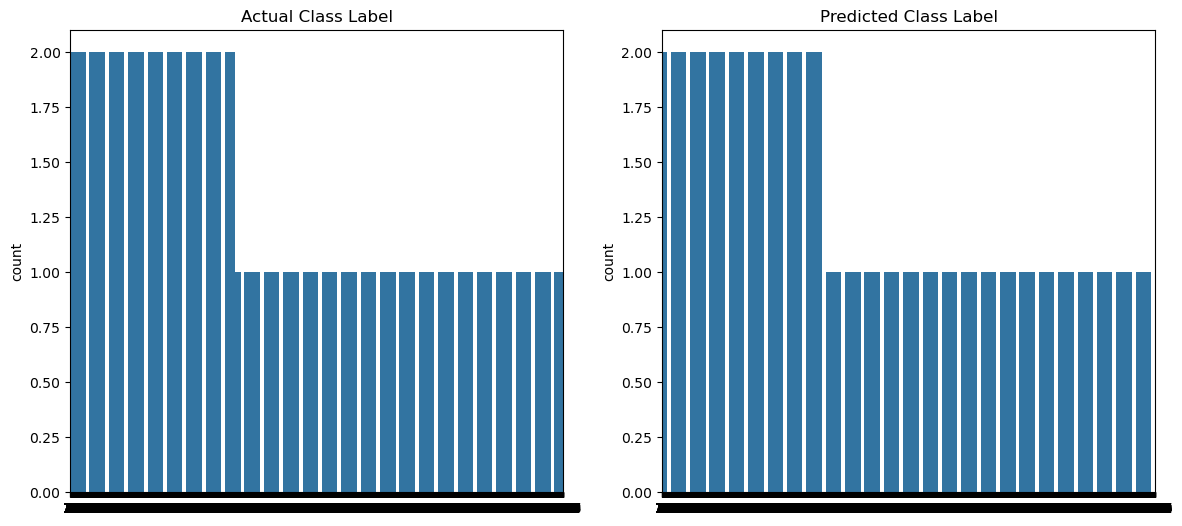

In [37]:
plt.figure(figsize=(14,6))
plt.subplot(121)
plt.title("Actual Class Label")
sns.countplot(predicted_df["Actual Class"])
plt.subplot(122)
plt.title("Predicted Class Label")
sns.countplot(predicted_df["Predicted Class"])

In [38]:
model diag

SyntaxError: invalid syntax (3708954873.py, line 1)

In [46]:
numerical_features = ['TotalVisits', 'TotalTimeSpentonWebsite', 'PageViewsPerVisit']

In [51]:
explainer = shap.Explainer(catboost_pipeline['classifier'])
shap_values = explainer(x_test)


In [53]:
shap_values[:, numerical_features]

.values =
array([[-2.77565796e-02, -6.89239288e-01,  1.89891317e-01],
       [-3.97364318e-02, -7.26284721e-01,  1.80112871e-01],
       [ 5.57274774e-01,  2.12559556e+00, -3.72080566e-04],
       ...,
       [ 7.30656677e-02,  2.03546337e+00,  1.10335392e-01],
       [-1.57527202e-03, -5.73154179e-01,  2.79107886e-01],
       [ 2.29650931e-02, -3.12960597e-01,  3.92687117e-01]])

.base_values =
array([-0.88118716, -0.88118716, -0.88118716, ..., -0.88118716,
       -0.88118716, -0.88118716])

.data =
array([[0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.0438247 , 0.82834507, 0.05      ],
       ...,
       [0.02390438, 0.70994718, 0.02727273],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ]])

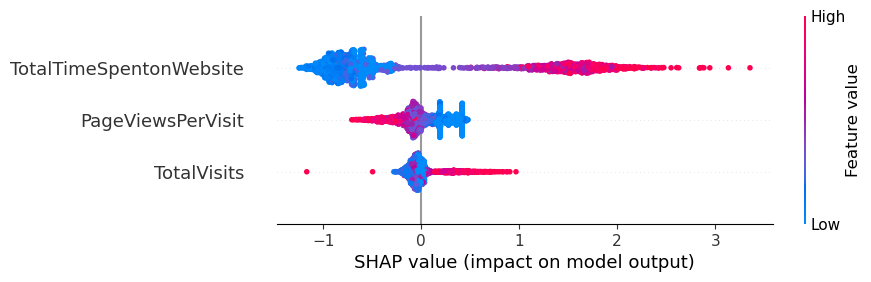

In [54]:
shap.plots.beeswarm(shap_values[:, numerical_features])

In [44]:
x_test.columns

Index(['Tags_Willrevertafterreadingtheemail', 'TotalTimeSpentonWebsite',
       'LeadProfile_PotentialLead', 'LeadQuality_None', 'Tags_Ringing',
       'LastNotableActivity_SMSSent', 'LeadOrigin_LeadAddForm',
       'LeadQuality_HighinRelevance', 'LeadQuality_Mightbe',
       'LastActivity_SMSSent',
       'Whatisyourcurrentoccupation_WorkingProfessional',
       'Tags_ClosedbyHorizzon', 'LeadSource_Reference', 'Tags_Alreadyastudent',
       'LastActivity_OlarkChatConversation', 'LeadQuality_Worst', 'Tags_None',
       'Tags_LosttoEINS', 'DoNotEmail_Yes', 'PageViewsPerVisit',
       'LastActivity_ConvertedtoLead', 'LeadSource_WeLearn',
       'LastActivity_Unreachable', 'Tags_InterestedinfulltimeMBA',
       'Tags_opphangup', 'Tags_wrongnumbergiven', 'LeadSource_PayperClickAds',
       'Tags_invalidnumber', 'Tags_RecognitionissueDECapproval',
       'LeadProfile_LateralStudent', 'Tags_intouchwithEINS',
       'LeadSource_WelingakWebsite', 'LastActivity_Approachedupfront',
       'LeadS

In [ ]:
x_train.loc[:, "Actual Class"] = y_train
x_train.loc[:, "Predicted Class"] = y_train_predict
x_test.loc[:, "Actual Class"] = y_test
x_test.loc[:, "Predicted Class"] = y_test_predict

In [56]:
thr = 0.29
#test_binary_pred = test_preds[:, 1] >= thr

fps = np.where((np.array(y_test) == False) & (y_test_predict == True))[0]
fns = np.where((np.array(y_test) == True) & (y_test_predict == False))[0]

print(f"There are {len(fps)} false positives")
print(f"There are {len(fns)} false negatives")

There are 68 false positives
There are 91 false negatives


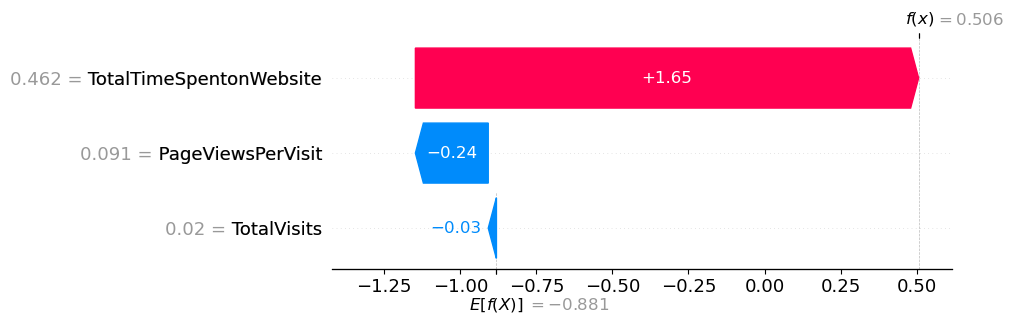

In [57]:
shap.plots.waterfall(shap_values[:, numerical_features][fps[0]])

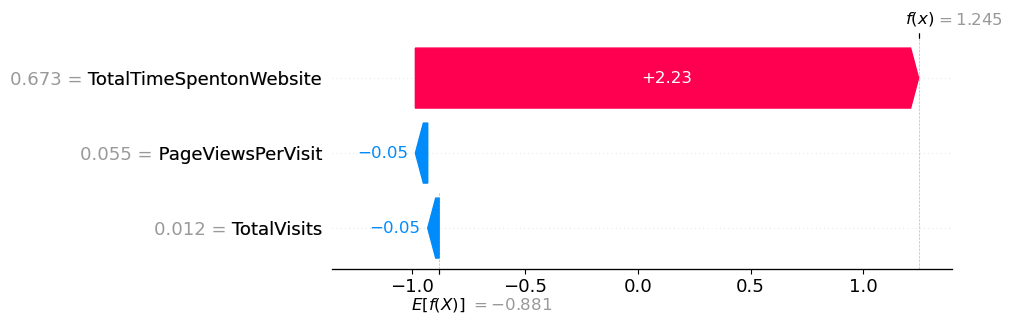

In [58]:
shap.plots.waterfall(shap_values[:, numerical_features][fns[0]])

In [59]:
joblib.dump(catboost_pipeline['classifier'], '../models/ctboost_final.joblib')

NameError: name 'joblib' is not defined